# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#set figure size
plt.rcParams["figure.figsize"] = [8,5]
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Data

In [2]:
df = pd.read_csv(r"C:\Users\SOUMYA RANJAN DAS\Downloads\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Shape of Data

In [4]:
df.shape

(1338, 7)

# Basic EDA

# EDA with bmi and Charges

C:\Users\SOUMYA RANJAN DAS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'BMI VS CHARGES')

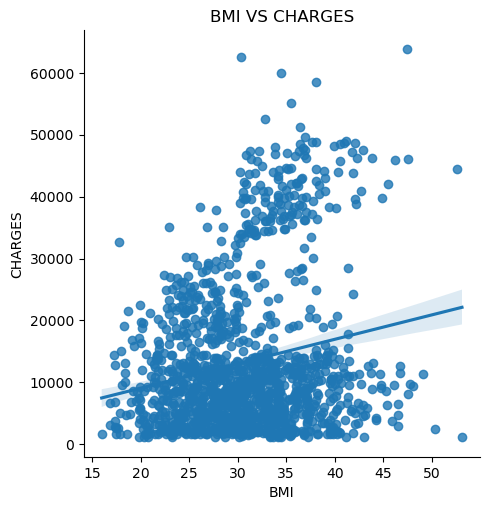

In [5]:
sns.lmplot(x = 'bmi',y = 'charges',data = df)
plt.xlabel("BMI")
plt.ylabel("CHARGES")
plt.title("BMI VS CHARGES")

# Age vs charges

C:\Users\SOUMYA RANJAN DAS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


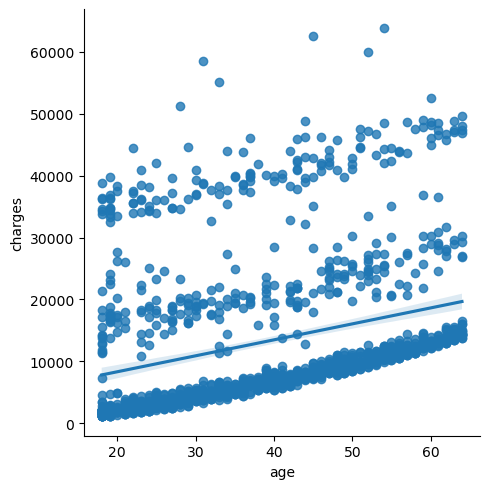

In [6]:
sns.lmplot(x = "age", y = "charges",data = df)

# sex vs charges

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#correlation plot
corr = df.corr(numeric_only = True)
corr
#sns.heatmap(corr, cmap = 'Wistia', annot = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='charges', ylabel='Count'>

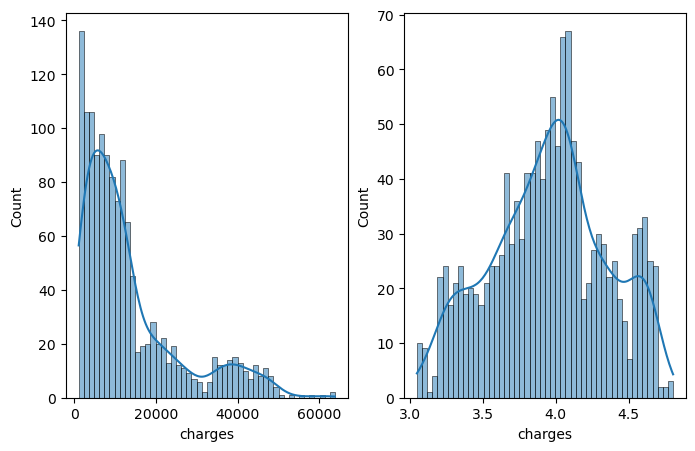

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols = 2)
#target column
sns.histplot(x = 'charges',data = df,kde = True,bins = 50,ax = ax1)
#rightskewed
#To correct skewness in the data , we perform log transformation
sns.histplot(np.log10(df['charges']),kde = True,bins = 50, fill = True,ax = ax2)


smoker vs charges and sex vs ***charges

<Axes: xlabel='sex', ylabel='charges'>

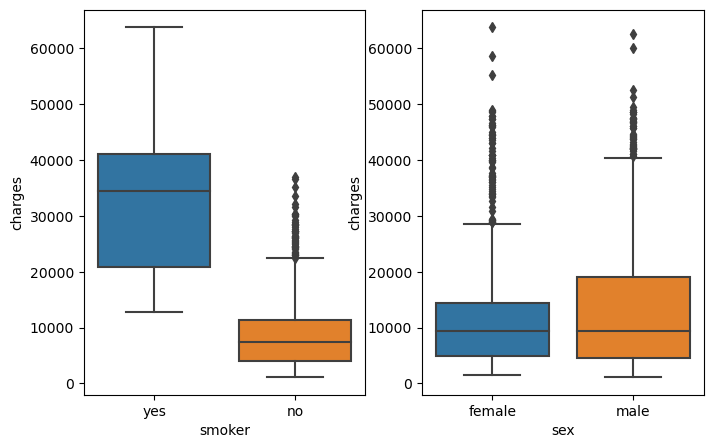

In [11]:
fig,(ax1,ax2) = plt.subplots(ncols = 2)
sns.boxplot(x = 'smoker', y = 'charges',data = df,ax = ax1)
sns.boxplot(x = 'sex', y = 'charges',data = df,ax = ax2)

In [12]:
#children vs charges
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<Axes: xlabel='children', ylabel='charges'>

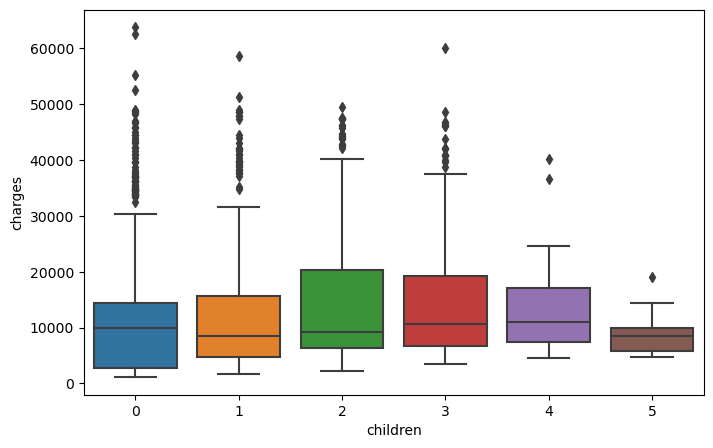

In [13]:
sns.boxplot(x = 'children', y = 'charges',data = df)

# Data Preprocessing - Encoding

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
catagorical_columns = ['sex','children','smoker','region']
#one hot Encodeng -- Machine learning models generally work with numerical data. One-hot encoding converts categorical variables into a binary format, representing each category with a unique binary column. This allows the model to process and understand the categorical information.
df_encoded = pd.get_dummies(data = df,prefix = 'OHE',prefix_sep = "_",columns = catagorical_columns,drop_first = True,dtype = 'int8')

In [16]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
df_encoded['charges'] = np.log10(df_encoded['charges'])
df_encoded['charges']

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1338, dtype: float64

In [19]:
X = df_encoded.drop(['charges'],axis = 1 )
y = df_encoded['charges']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

In [21]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///C:/Mlflow reg'

In [22]:
import mlflow

In [23]:
mlflow.set_experiment("Insurance")

<Experiment: artifact_location='file:///C:/Mlflow reg/811338310047614942', creation_time=1715952108638, experiment_id='811338310047614942', last_update_time=1715952108638, lifecycle_stage='active', name='Insurance', tags={}>

In [24]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_training_score", testing_score_rf)
    mlflow.log_metric("gbm_training_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

C:\Users\SOUMYA RANJAN DAS\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [25]:
import requests
import json

#data = {"columns": iris.feature_names, "data": [[6.1, 2.8, 4.7, 1.2]]}
data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8002/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [4.152087580965838, 3.7502999927237273, 4.295660150385691, 3.996739230586704, 3.6411507759410697, 3.8325005375284418, 4.654702091912902, 3.6975382430096126, 4.151829271250157, 4.675561108304874, 3.364574993499913, 4.435836859423155, 3.396753202919764, 4.153037439615225, 3.8292361261579333, 3.7389231852919993, 3.827484271165562, 3.3622927512745484, 4.64031989726615, 4.603310268124915, 4.670185021036271, 3.8286106160431204, 3.8246281982303283, 4.083934059271364, 4.64029471325803, 3.6787525550652216, 3.730421733831826, 4.575799388178378, 3.327057057425346, 3.9872603566553453, 4.142006721405866, 3.5171863926234845, 3.726660437334035, 4.21500067422051, 3.7675029334328394, 4.315753799459949, 4.090694677460784, 3.833841016488833, 4.010910729843297, 3.7716793184989212, 4.089899200647221, 4.613193173874886, 4.011615394136078, 4.422735611960229, 4.0942145438747515, 4.00745972725783, 3.7617647766573827, 3.780199746055573, 3.9852690542832416, 3.7638448343887174, 4.076280057383015, 

In [26]:
predictions["predictions"]

[4.152087580965838,
 3.7502999927237273,
 4.295660150385691,
 3.996739230586704,
 3.6411507759410697,
 3.8325005375284418,
 4.654702091912902,
 3.6975382430096126,
 4.151829271250157,
 4.675561108304874,
 3.364574993499913,
 4.435836859423155,
 3.396753202919764,
 4.153037439615225,
 3.8292361261579333,
 3.7389231852919993,
 3.827484271165562,
 3.3622927512745484,
 4.64031989726615,
 4.603310268124915,
 4.670185021036271,
 3.8286106160431204,
 3.8246281982303283,
 4.083934059271364,
 4.64029471325803,
 3.6787525550652216,
 3.730421733831826,
 4.575799388178378,
 3.327057057425346,
 3.9872603566553453,
 4.142006721405866,
 3.5171863926234845,
 3.726660437334035,
 4.21500067422051,
 3.7675029334328394,
 4.315753799459949,
 4.090694677460784,
 3.833841016488833,
 4.010910729843297,
 3.7716793184989212,
 4.089899200647221,
 4.613193173874886,
 4.011615394136078,
 4.422735611960229,
 4.0942145438747515,
 4.00745972725783,
 3.7617647766573827,
 3.780199746055573,
 3.9852690542832416,
 3.7638